# 1. Preparación de datos

## 1.1 Importar librerias

In [17]:
import numpy as np
import cv2
import os
from os import listdir
from os.path import join
import sys
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm
from google.colab import drive
import matplotlib.pyplot as plt

# 1.2 Conexiones

### 1.2.1 Conexión al repositorio en Drive

In [18]:
#Conectar al drive local
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#Conectar al repositorio
path = '/content/drive/My Drive/cod/A3_helath'

sys.path.append(path) #Importar las funciones propias a través de import, porque incluye la carpeta del repositorio como uno de esos paquetes para que import busque funciones
os.chdir(path) #Subir y descargar archivos de la ruta del repositorio de trabajo

### 1.2.2 Importar funciones

In [20]:
%run funciones.ipynb

# 2. Exploración de imágenes

In [21]:
# Rutas de entrenamiento y prueba
train_path = os.path.join(path, 'data/Training')
test_path = os.path.join(path, 'data/Testing')

In [22]:
# Visualización de dos imágenes ejemplo
img1 = cv2.imread('/content/drive/My Drive/cod/A3_helath/data/Testing/glioma/Te-gl_0010.jpg')
img2 = cv2.imread('/content/drive/My Drive/cod/A3_helath/data/Training/notumor/Tr-no_0010.jpg')

# Convertir de BGR a RGB para que plt las muestre bien
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

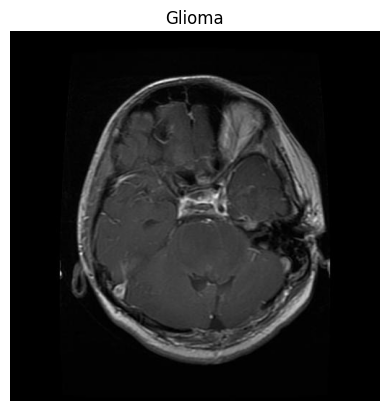

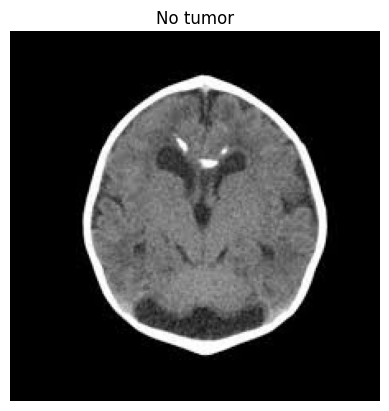

In [23]:
# Mostrar imágenes
plt.imshow(img1_rgb)
plt.title('Glioma')
plt.axis('off')
plt.show()

plt.imshow(img2_rgb)
plt.title('No tumor')
plt.axis('off')
plt.show()

In [25]:
# Características numéricas
print("img1 shape:", img1.shape)
print("img2 shape:", img2.shape)

print("img1 max pixel value:", img1.max())
print("img1 min pixel value:", img1.min())
print("img2 max pixel value:", img2.max())
print("img2 min pixel value:", img2.min())

print("Total pixels in img2:", np.prod(img2.shape))

img1 shape: (512, 512, 3)
img2 shape: (225, 225, 3)
img1 max pixel value: 255
img1 min pixel value: 0
img2 max pixel value: 255
img2 min pixel value: 0
Total pixels in img2: 151875


# 3. Definir resolución óptima

In [26]:
# Buscar la imagen con menor resolución entre los dos conjuntos (para evitar perdida de información innecesaria al reescalar)
res_train, img_train = obtener_resolucion_minima(train_path)
res_test, img_test = obtener_resolucion_minima(test_path)

In [ ]:
# Elegir la menor resolución (para no generar información al redimensionar)
# Comparar el número total de píxeles entre las resoluciones
area_train = res_train[0] * res_train[1]
area_test = res_test[0] * res_test[1]

# Seleccionar la resolución con menor cantidad de píxeles
if area_train < area_test:
    resolucion_final = res_train
else:
    resolucion_final = res_test

print(f"Resolución seleccionada: {resolucion_final}")

Resolución seleccionada: (150, 198)


# 4. Carga de imágenes completas y etiquetas

In [ ]:
# Cargar las imágenes reescaladas con sus etiquetas
x_train, y_train, _ = cargar_imagenes(train_path, tamaño=resolucion_final)
x_test, y_test, _ = cargar_imagenes(test_path, tamaño=resolucion_final)

Cargando pituitary: 100%|██████████| 300/300 [00:03<00:00, 90.76it/s] 


In [ ]:
# Convertir a array para entrenamiento
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
# Ver formas de los datos
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (5712, 198, 150, 3) (5712, 1)
Test shape: (1311, 198, 150, 3) (1311, 1)


In [ ]:
# Verificar una muestra
print("Dimensión de una imagen:", x_train[0].shape)
print("Total variables por imagen:", np.prod(x_train[0].shape))

Dimensión de una imagen: (198, 150, 3)
Total variables por imagen: 89100


# 5. Guardar datos procesados

In [ ]:
# Crear carpeta si no existe
output_path = os.path.join('data', 'salidas')
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [ ]:
# Guardar arrays con Joblib
joblib.dump(x_train, os.path.join(output_path, "x_train.pkl"))
joblib.dump(y_train, os.path.join(output_path, "y_train.pkl"))
joblib.dump(x_test, os.path.join(output_path, "x_test.pkl"))
joblib.dump(y_test, os.path.join(output_path, "y_test.pkl"))

['data/salidas/y_test.pkl']